In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

2024-06-18 11:48:36.740759: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_images_from_excel(directory, excel_path, target_size=(224, 224)):
    # Load the Excel file into a DataFrame
    df = pd.read_excel(excel_path)
    
    # Filter out rows where subcategory is 'photo' or 'drawing'
    df_filtered = df[~df['subcategory'].isin(['photo', 'drawing'])]
    
    # Get image paths
    image_paths = df_filtered['new image path'].apply(lambda x: os.path.join(directory, x)).tolist()
    
    # Load and process images
    images = [load_img(path, target_size=target_size, color_mode='grayscale') for path in image_paths]
    images_array = np.array([img_to_array(image) for image in images]).astype('float32') / 255.
    
    return images_array, image_paths

# Define the directory containing the images and the path to the Excel file
image_directory = "../"
excel_file_path = "../cropped_and_labeled_image_data/2022_cropped_and_labeled_figs.xlsx"

images, image_paths = load_images_from_excel(image_directory, excel_file_path)

print(images.shape)
print("Filtered and loaded image paths:", image_paths)


# Assigning to x_train and x_test
x_train = images[:-10]
x_test = images[-10:]

print(x_train.shape)
print(x_test.shape)


(48, 224, 224, 1)
Filtered and loaded image paths: ['../final_figures/2022/F1_P15_Rauch & Ansari_2022_OrgSci_Waging War from Remote Cubicles How Workers Cope with Technologies That Disrupt the Meaning and Morality of Their Work.png', '../final_figures/2022/F2_P19_Diaz-Moriana_2022_J Management Studies _ Untangling Goal Tensions in Family Firms  A Sensemaking Approach.png', '../final_figures/2022/F1_P9_Foy & Gruber_2022_AMJ_Identity Society Mis Alignment and the Instrumentalization of Firm Creation.png', '../final_figures/2022/F3_P20_Sawyer & Clair_ASQ_2022_Hope Cultures in Organizations - Tackling the Grand Challenge of Commercial Sex Exploitation.png', '../final_figures/2022/F2_P15_Sawyer & Clair_ASQ_2022_Hope Cultures in Organizations - Tackling the Grand Challenge of Commercial Sex Exploitation.png', '../final_figures/2022/F1_P13_Azambuja_2022_J Management Studie_Walling in and Walling out  Middle Managers  Boundary Work.png', '../final_figures/2022/F3_P23_Sawyer & Clair_ASQ_2022_Ho

In [3]:
# (x_train, _), (x_test, _) = fashion_mnist.load_data()

# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.

# print (x_train.shape)
# print (x_test.shape)

In [4]:
class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(tf.math.reduce_prod(shape).numpy(), activation='sigmoid'),
      layers.Reshape(shape)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


shape = x_test.shape[1:]
latent_dim = 64
autoencoder = Autoencoder(latent_dim, shape)

In [5]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [6]:
autoencoder.fit(x_train, x_train,
                epochs=30,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - loss: 0.2234 - val_loss: 0.1778
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.1795 - val_loss: 0.1012
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0955 - val_loss: 0.0583
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0464 - val_loss: 0.0493
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.0355 - val_loss: 0.0493
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 0.0351 - val_loss: 0.0496
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0346 - val_loss: 0.0497
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0356 - val_loss: 0.0497
Epoch 9/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0342 - val_loss: 0.0497
Epoch 10/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0349 - val_loss: 0.0497
Epoch 11/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0353 - val_loss: 0.0497
Epoch 12/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0351 - val_loss: 0.04

In [7]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

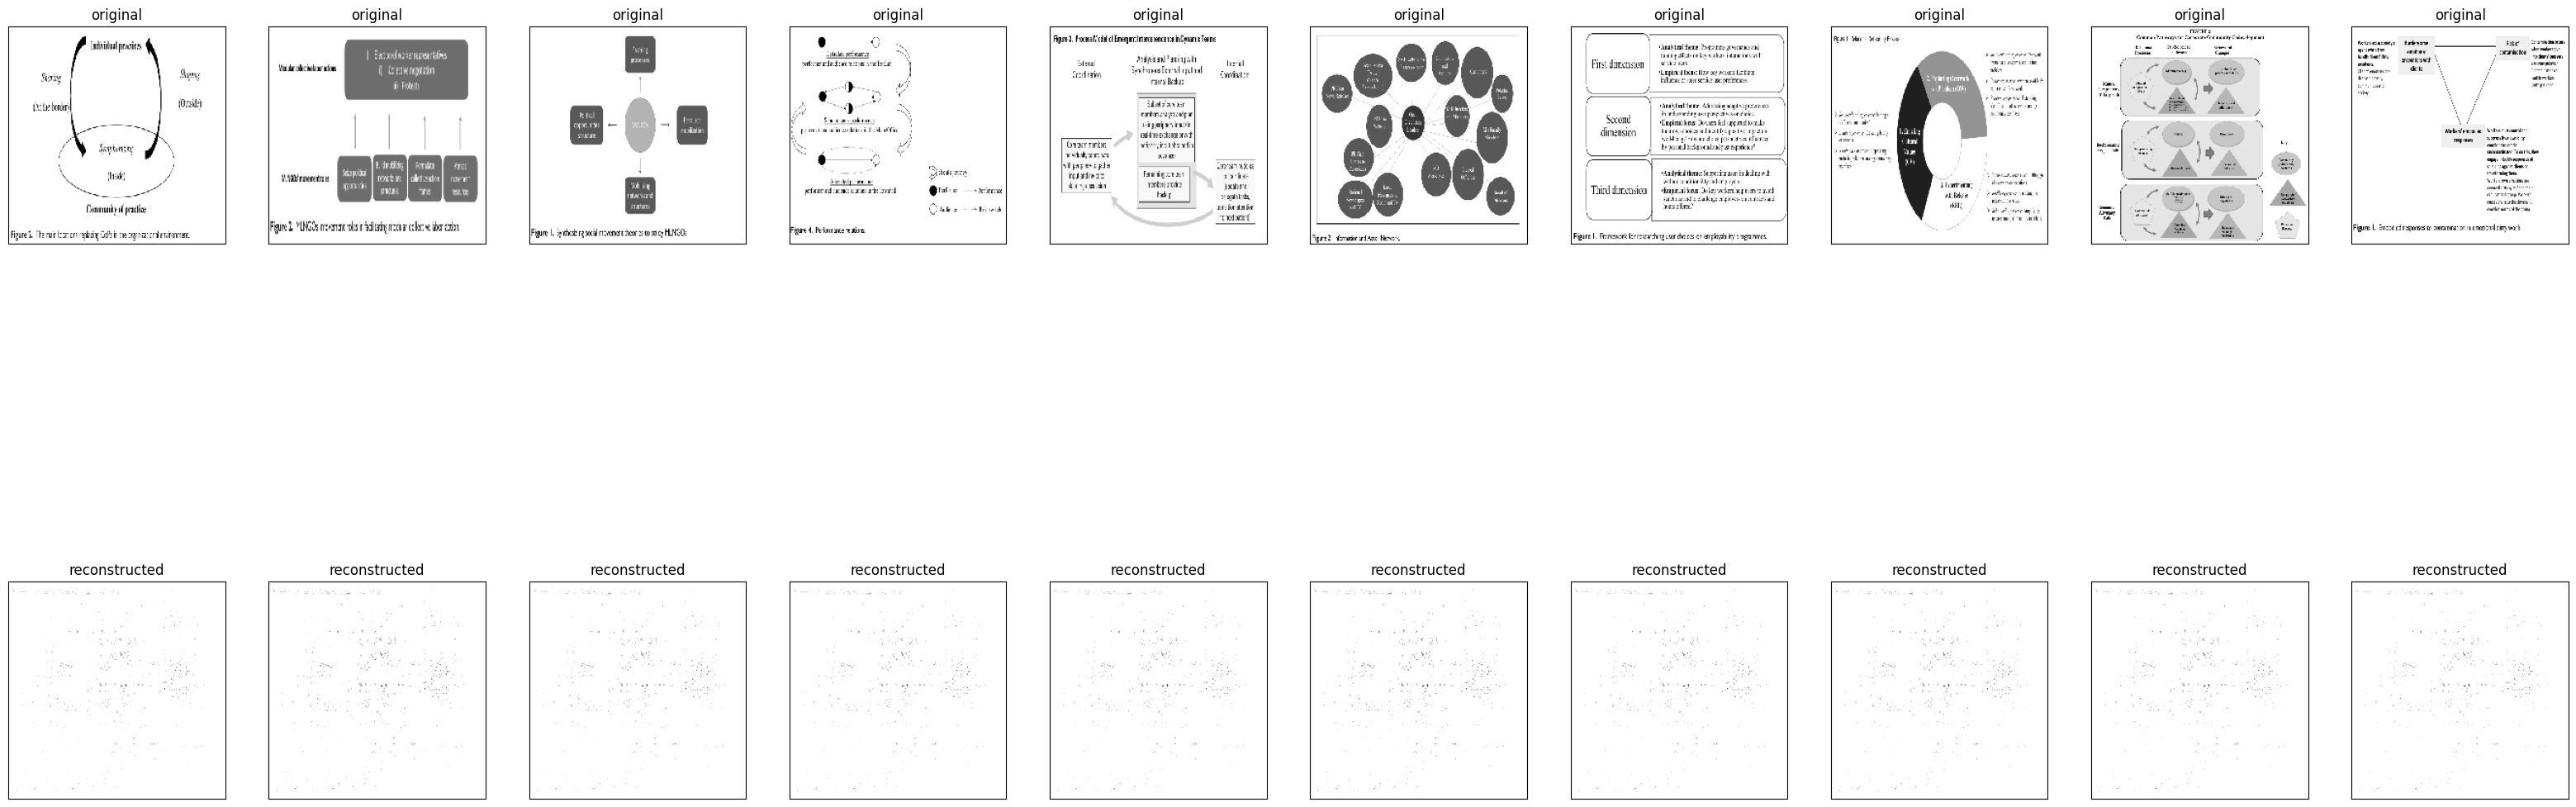

In [15]:
n = 10
plt.figure(figsize=(40, 16))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()